# Spam Text Message by KGP Talkie

In [2]:
!pip install scikit-learn

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt


In [4]:
df=pd.read_csv('Datasets/spam.tsv',sep='\t')

In [5]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [6]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [7]:
len(df)

5572

In [8]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [9]:
ham=df[df['label']=='ham']
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [10]:
spam=df[df['label']=='spam']
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [11]:
ham.shape,spam.shape

((4825, 4), (747, 4))

In [12]:
ham=ham.sample(spam.shape[0])

In [13]:
ham.shape,spam.shape

((747, 4), (747, 4))

In [14]:
data=ham.append(spam,ignore_index=True)
data.head()

,label,message,length,punct
0,ham,Please tell me not all of my car keys are in y...,55,0
1,ham,Have you heard from this week?,30,1
2,ham,Ahhhh...just woken up!had a bad dream about u ...,146,8
3,ham,* Am on my way,14,1
4,ham,That depends. How would you like to be treated...,50,4


# Exploratory Data Analysis

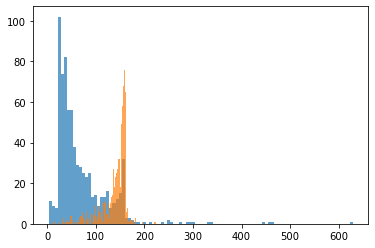

In [15]:
plt.hist(data[data['label']=='ham']['length'], bins=100,alpha=0.7)
plt.hist(data[data['label']=='spam']['length'], bins=100,alpha=0.7)
plt.show()

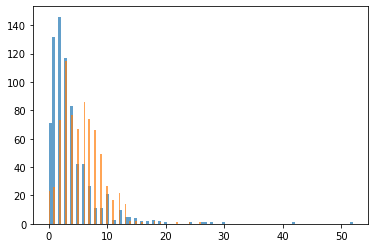

In [16]:
plt.hist(data[data['label']=='ham']['punct'], bins=100,alpha=0.7)
plt.hist(data[data['label']=='spam']['punct'], bins=100,alpha=0.7)
plt.show()

# Data Preparation

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.pipeline import Pipeline


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
data.head()

,label,message,length,punct
0,ham,Please tell me not all of my car keys are in y...,55,0
1,ham,Have you heard from this week?,30,1
2,ham,Ahhhh...just woken up!had a bad dream about u ...,146,8
3,ham,* Am on my way,14,1
4,ham,That depends. How would you like to be treated...,50,4


In [33]:
X_train,X_test,y_train,y_test=train_test_split(data['message'],data['label'],test_size=0.3,random_state=0,shuffle=True, stratify=data['label'])


In [34]:
y_train

1128    spam
742      ham
477      ham
542      ham
1277    spam
        ... 
1211    spam
312      ham
268      ham
272      ham
1222    spam
Name: label, Length: 1045, dtype: object

# Bag of words Creation 

In [22]:
vectorizer=TfidfVectorizer()

In [23]:
X_train=vectorizer.fit_transform(X_train)

In [24]:
X_train.shape

(1045, 3629)

In [25]:
X_train

<1045x3629 sparse matrix of type '<class 'numpy.float64'>'
	with 17713 stored elements in Compressed Sparse Row format>

# Pipeline and RF

In [35]:
clf=Pipeline([('tfidf',TfidfVectorizer()),('clf',RandomForestClassifier(n_estimators=100,n_jobs=-1))])

In [36]:
clf.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier(n_jobs=-1))])

In [37]:
y_pred=clf.predict(X_test)

In [38]:
confusion_matrix(y_test,y_pred)

array([[225,   0],
       [ 23, 201]], dtype=int64)

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.91      1.00      0.95       225
        spam       1.00      0.90      0.95       224

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



In [40]:
accuracy_score(y_test,y_pred)

0.9487750556792873

In [41]:
clf.predict(["Hi, I'm Mahin"])

array(['ham'], dtype=object)

In [42]:
clf.predict(["Hi, I love you"])

array(['ham'], dtype=object)

In [43]:
clf.predict([" you have won  tickets to the USA this summer. "])

array(['ham'], dtype=object)

# SVM

In [44]:
clf=Pipeline([('tfidf',TfidfVectorizer()),('clf',SVC(C=2000,gamma='auto',))])

In [45]:
clf.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', SVC(C=2000, gamma='auto'))])

In [46]:
y_pred=clf.predict(X_test)

In [47]:
confusion_matrix(y_test,y_pred)

array([[223,   2],
       [ 20, 204]], dtype=int64)

In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.92      0.99      0.95       225
        spam       0.99      0.91      0.95       224

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



In [49]:
accuracy_score(y_test,y_pred)

0.9510022271714922

In [50]:
clf.predict(["Hi, I'm Mahin"])

array(['ham'], dtype=object)

In [51]:
clf.predict(["Hi, I love you"])

array(['ham'], dtype=object)

In [52]:
clf.predict([" you have won tickets to the USA this summer. "])

array(['spam'], dtype=object)

In [53]:
clf.predict(["Your phone number has been selected for 1000$ "])

array(['spam'], dtype=object)

In [54]:
clf.predict(["Your phone number has been selected for a lottery this year. "])

array(['spam'], dtype=object)

In [56]:
clf.predict(["Good news! you won a free trip. "])

array(['ham'], dtype=object)

In [60]:
clf.predict([" hurrah! your number got selected for lottery"])

array(['spam'], dtype=object)